In [1]:
####################################################################
###    This is the PYTHON version of program 3.4 from page 87 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SEIR model with four different age-groups and 	   #
### yearly "movements" between the groups mimicking the school year#
####################################################################


In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import string as str
from matplotlib.font_manager import FontProperties

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infected period. Note that movement between classes is scaled by n to maintain the average infected period even when the number of stages changes.

*mu is the death rate and we assume that ν=μ

*n is the vector of initial proportions of each age class.

*m is the number of classes (m=4).

*S0 is the vector of initial proportions of the population that are both susceptible and in a particular age group.

*I0 is the vector of initial proportions of the population that are both infected (Ii(0)=I(0)/n) and in a particular age group.

In [3]:
m=4
mu=np.array([0.0,0.0,0.0,1.0/(55*365)])
nu=np.array([1.0/(55*365),0.0,0.0,0.0])
n=np.array([6.0,4.0,10.0,55.0])/75.0
S0=np.array([0.05,0.01,0.01,0.008])
E0=np.array([0.0001,0.0001,0.0001,0.0001])
I0=np.array([0.0001,0.0001,0.0001,0.0001])
R0= np.array([ 0.0298, 0.04313333, 0.12313333, 0.72513333])
ND=MaxTime=365.
beta=np.array(([2.089, 2.089, 2.086, 2.037], [2.089, 9.336, 2.086, 2.037],
               [2.086, 2.086, 2.086, 2.037], [2.037, 2.037, 2.037, 2.037]))
gamma=1/5.0
sigma=1/8.0
TS=1.0
INPUT=np.hstack((S0,E0,I0,R0))

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((16))
	V = INP
	for i in range(m):
		Inf = np.dot(beta[i],  V[list(np.array(range(m))+2*m)]) *V[i]
		Y[i] = nu[i]*n[3] - Inf - mu[i] * V[i]
		Y[(m+i)] = Inf - mu[i] * V[(m+i)] - sigma * V[(m+i)]
		Y[(2*m+i)] = sigma * V[(m+i)] - gamma * V[(2*m+i)] - mu[i] * V[(2*m+i)]
		Y[(3*m+i)] = gamma * V[(2*m+i)] - mu[i] * V[(3*m+i)]
	return Y   # For odeint

In [5]:
##simulate for 100 years, consider ageing for each year
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

RES2=np.zeros((16))
k=1
while k<=100:
	RES = spi.odeint(diff_eqs,INPUT,t_range)
	INPUT=RES[-1]
	INPUT[15]=INPUT[15]+INPUT[14]/10
	INPUT[14]=INPUT[14]+INPUT[13]/4-INPUT[14]/10
	INPUT[13]=INPUT[13]+INPUT[12]/6-INPUT[13]/4
	INPUT[12]=INPUT[12]-INPUT[12]/6
	
	INPUT[11]=INPUT[11]+INPUT[10]/10
	INPUT[10]=INPUT[10]+INPUT[9]/4-INPUT[10]/10
	INPUT[9]=INPUT[9]+INPUT[8]/6-INPUT[9]/4
	INPUT[8]=INPUT[8]-INPUT[8]/6
		
	INPUT[7]=INPUT[7]+INPUT[6]/10
	INPUT[6]=INPUT[6]+INPUT[5]/4-INPUT[6]/10
	INPUT[5]=INPUT[5]+INPUT[4]/6-INPUT[5]/4
	INPUT[4]=INPUT[4]-INPUT[4]/6
	
	INPUT[3]=INPUT[3]+INPUT[2]/10
	INPUT[2]=INPUT[2]+INPUT[1]/4-INPUT[2]/10
	INPUT[1]=INPUT[1]+INPUT[0]/6-INPUT[1]/4
	INPUT[0]=INPUT[0]-INPUT[0]/6
	RES2=np.vstack((RES2,RES))
	k=k+1
    

RES=RES2[1:,]


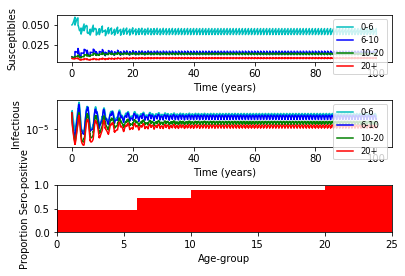

In [6]:
##Ploting
Time=np.arange(100*(ND+1))/(ND+1)
pl.subplot(311)
pl.plot(Time,RES[:,0], 'c', label='0-6')
pl.plot(Time,RES[:,1], 'b', label='6-10')
pl.plot(Time,RES[:,2], 'g', label='10-20')
pl.plot(Time,RES[:,3], 'r', label='20+')
pl.ylabel('Susceptibles')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))
pl.subplots_adjust(hspace=0.8)



pl.subplot(312)
pl.semilogy(Time,RES[:,0+2*m], 'c', label='0-6')
pl.semilogy(Time,RES[:,1+2*m], 'b', label='6-10')
pl.semilogy(Time,RES[:,2+2*m], 'g', label='10-20')
pl.semilogy(Time,RES[:,3+2*m], 'r', label='20+')
pl.ylabel('Infectious')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))


R=np.zeros(4)
pl.subplot(313)
mm=np.where(Time>(ND-365.))
for i in range(4):
	R[i]=1.-np.mean(RES[mm,i])/n[i]

pl.fill(np.array([0, 0, 6, 6,  6, 6, 10, 10, 10, 10, 20, 20, 20, 20, 75, 75]),\
np.array([0, R[0], R[0], 0, 0, R[1], R[1], 0, 0, R[2], R[2], 0, 0, R[3], R[3], 0]),'r')
pl.xlabel('Age-group')
pl.ylabel('Proportion Sero-positive')
pl.xlim((0,25))
pl.ylim((0,1))
pl.show()